In [112]:
pip install numpy pandas seaborn plotly scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor,VotingRegressor,StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [28]:
house_price_dataset = pd.read_csv("/Users/leduc/TrainHousePrice/HousePrice.csv")

In [179]:
training_df = house_price_dataset[['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','BedroomAbvGr','SalePrice']]

print("Doc du lieu thanh cong")
print('Tong so hang: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Doc du lieu thanh cong
Tong so hang: 1460




,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,SalePrice
0,8450,2003,856,854,3,208500
1,9600,1976,1262,0,3,181500
2,11250,2001,920,866,3,223500
3,9550,1915,961,756,3,140000
4,14260,2000,1145,1053,4,250000
...,...,...,...,...,...,...
195,2280,1976,855,601,3,148500
196,9416,2007,1726,0,3,311872
197,25419,1918,1360,1360,4,235000
198,5520,1912,929,929,5,104000


In [46]:
max_house_price = training_df['SalePrice'].max()
print("Gia nha cao nhat la: {price_max}".format(price_max=max_house_price))

min_house_price = training_df['SalePrice'].min()
print("Gia nha nho nhat la: {price_min}".format(price_min=min_house_price))

num_unique_bedroom = training_df['BedroomAbvGr'].nunique()
print("Co {number} loai phong ngu".format(number = num_unique_bedroom))

mean_1stFl =  training_df['1stFlrSF'].mean()
print("Dien tich trung binh cua tang 1: {mean} ".format(mean = mean_1stFl))

missing_values = training_df.isnull().sum().sum()
print("Co du lieu bi mat khong:","Khong" if missing_values==0 else "Co")

Gia nha cao nhat la: 755000
Gia nha nho nhat la: 34900
Co 8 loai phong ngu
Dien tich trung binh cua tang 1: 1162.626712328767 
Co du lieu bi mat khong: Khong


In [47]:
training_df.corr(numeric_only=True)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,SalePrice
LotArea,1.000000,0.014228,0.299475,0.050986,0.119690,0.263843
YearBuilt,0.014228,1.000000,0.281986,0.010308,-0.070651,0.522897
1stFlrSF,0.299475,0.281986,1.000000,-0.202646,0.127401,0.605852
2ndFlrSF,0.050986,0.010308,-0.202646,1.000000,0.502901,0.319334
BedroomAbvGr,0.119690,-0.070651,0.127401,0.502901,1.000000,0.168213
SalePrice,0.263843,0.522897,0.605852,0.319334,0.168213,1.000000


In [48]:
print("2 feature manh nhat la dien tich tang 1(1stFlrSF) va nam xay dung (YearBuilt)")

2 feature manh nhat la dien tich tang 1(1stFlrSF) va nam xay dung (YearBuilt)


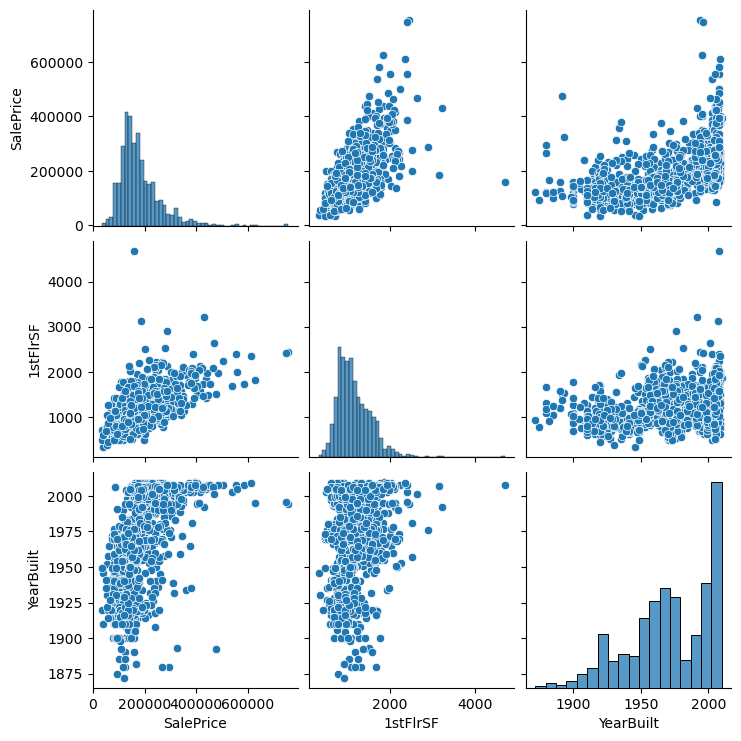

In [175]:
sns.pairplot(training_df, x_vars=["SalePrice","1stFlrSF","YearBuilt"], y_vars=["SalePrice","1stFlrSF","YearBuilt"])

In [180]:
X = training_df[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']] 
y = training_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Size of training set: {X_train.shape[0]} samples')
print(f'Size of validation set: {X_valid.shape[0]} samples')
print(f'Size of test set: {X_test.shape[0]} samples')


Size of training set: 1168 samples
Size of validation set: 146 samples
Size of test set: 146 samples


In [227]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_valid)

ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_valid)

mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', learning_rate_init=0.001, alpha=0.0001, max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_valid)


print("Training model successfully")



Training model successfully


In [230]:
mae_linear = mean_absolute_error(y_valid, linear_pred)
mse_linear = mean_squared_error(y_valid, linear_pred)
r2_linear = r2_score(y_valid, linear_pred)

mae_mlp = mean_absolute_error(y_valid, mlp_pred)
mse_mlp = mean_squared_error(y_valid, mlp_pred)
r2_mlp = r2_score(y_valid, mlp_pred)


Traning model succesfully.


In [232]:
linear_model = LinearRegression()
ridge_model = Ridge()
mlp_model = MLPRegressor(max_iter=1000)

bagging_lr = BaggingRegressor(estimator=linear_model, n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
bagging_lr_pred = bagging_lr.predict(X_valid)


bagging_ridge = BaggingRegressor(estimator=ridge_model, n_estimators=10, random_state=42)
bagging_ridge.fit(X_train, y_train)
bagging_ridge_pred = bagging_ridge.predict(X_valid)

bagging_lr_ridge = BaggingRegressor(estimator=VotingRegressor(estimators=[('lr', linear_model), ('ridge', ridge_model)]), n_estimators=10, random_state=42)
bagging_lr_ridge.fit(X_train, y_train)
bagging_lr_ridge_pred = bagging_lr_ridge.predict(X_valid)


mae_bagging_lr = mean_absolute_error(y_valid, bagging_lr_pred)
mse_bagging_lr = mean_squared_error(y_valid, bagging_lr_pred)
r2_bagging_lr = r2_score(y_valid, bagging_lr_pred)


mae_bagging_ridge = mean_absolute_error(y_valid, bagging_ridge_pred)
mse_bagging_ridge = mean_squared_error(y_valid, bagging_ridge_pred)
r2_bagging_ridge = r2_score(y_valid, bagging_ridge_pred)

bagging_mlp = BaggingRegressor(estimator=mlp_model, n_estimators=10, random_state=42)
bagging_mlp.fit(X_train, y_train)
bagging_mlp_pred = bagging_mlp.predict(X_valid)

mae_bagging_mlp = mean_absolute_error(y_valid, bagging_mlp_pred)
mse_bagging_mlp = mean_squared_error(y_valid, bagging_mlp_pred)
r2_bagging_mlp = r2_score(y_valid, bagging_mlp_pred)

mae_bagging_lr_ridge = mean_absolute_error(y_valid, bagging_lr_ridge_pred)
mse_bagging_lr_ridge = mean_squared_error(y_valid, bagging_lr_ridge_pred)
r2_bagging_lr_ridge = r2_score(y_valid, bagging_lr_ridge_pred)

# In kết quả
print("Linear Regression - MAE:", mae_linear, ", MSE:", mse_linear, ", R²:", r2_linear)
print("MLP Regressor - MAE:", mae_mlp, ", MSE:", mse_mlp, ", R²:", r2_mlp)
print("Bagging (Linear Regression) - MAE:", mae_bagging_lr, ", MSE:", mse_bagging_lr, ", R2:", r2_bagging_lr)
print("Bagging (Ridge Regression) - MAE:", mae_bagging_ridge, ", MSE:", mse_bagging_ridge, ", R2:", r2_bagging_ridge)
print("Bagging (MLP Regressor) - MAE:", mae_bagging_mlp, ", MSE:", mse_bagging_mlp, ", R2:", r2_bagging_mlp)
print("Bagging (Linear + Ridge) - MAE:", mae_bagging_lr_ridge, ", MSE:", mse_bagging_lr_ridge, ", R2:", r2_bagging_lr_ridge)

Linear Regression - MAE: 28901.694985010214 , MSE: 1514585988.0280194 , R²: 0.7414800707593758
MLP Regressor - MAE: 33780.22816187389 , MSE: 2264256073.6894956 , R²: 0.6135212364436367
Bagging (Linear Regression) - MAE: 28855.72467271229 , MSE: 1515376873.2300274 , R2: 0.7413450770461918
Bagging (Ridge Regression) - MAE: 28854.74112121242 , MSE: 1515368741.1458802 , R2: 0.7413464650861148
Bagging (MLP Regressor) - MAE: 33711.09968348135 , MSE: 2278537540.588955 , R2: 0.6110835776764989
Bagging (Linear + Ridge) - MAE: 28855.232896962356 , MSE: 1515372677.2923157 , R2: 0.7413457932376322


In [226]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', learning_rate_init=0.001, alpha=0.0001, max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)

bagging_lr = BaggingRegressor(estimator=linear_model, n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)

bagging_ridge = BaggingRegressor(estimator=ridge_model, n_estimators=10, random_state=42)
bagging_ridge.fit(X_train, y_train)

bagging_mlp = BaggingRegressor(estimator=mlp_model, n_estimators=10, random_state=42)
bagging_mlp.fit(X_train, y_train)

def check_overfitting(y_train, y_train_pred, y_valid, y_valid_pred):
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_valid, y_valid_pred)
    
    return train_error, test_error

linear_train_pred = linear_model.predict(X_train)
linear_valid_pred = linear_model.predict(X_valid)
train_error_linear, test_error_linear = check_overfitting(y_train, linear_train_pred, y_valid, linear_valid_pred)

ridge_train_pred = ridge_model.predict(X_train)
ridge_valid_pred = ridge_model.predict(X_valid)
train_error_ridge, test_error_ridge = check_overfitting(y_train, ridge_train_pred, y_valid, ridge_valid_pred)

mlp_train_pred = mlp_model.predict(X_train)
mlp_valid_pred = mlp_model.predict(X_valid)
train_error_mlp, test_error_mlp = check_overfitting(y_train, mlp_train_pred, y_valid, mlp_valid_pred)

bagging_lr_train_pred = bagging_lr.predict(X_train)
bagging_lr_valid_pred = bagging_lr.predict(X_valid)
train_error_bagging_lr, test_error_bagging_lr = check_overfitting(y_train, bagging_lr_train_pred, y_valid, bagging_lr_valid_pred)

bagging_ridge_train_pred = bagging_ridge.predict(X_train)
bagging_ridge_valid_pred = bagging_ridge.predict(X_valid)
train_error_bagging_ridge, test_error_bagging_ridge = check_overfitting(y_train, bagging_ridge_train_pred, y_valid, bagging_ridge_valid_pred)

bagging_mlp_train_pred = bagging_mlp.predict(X_train)
bagging_mlp_valid_pred = bagging_mlp.predict(X_valid)
train_error_bagging_mlp, test_error_bagging_mlp = check_overfitting(y_train, bagging_mlp_train_pred, y_valid, bagging_mlp_valid_pred)

print("Linear Regression - Train Error:", int(train_error_linear), ", Test Error:", int(test_error_linear))
print("Ridge Regression - Train Error:", int(train_error_ridge), ", Test Error:", int(test_error_ridge))
print("MLP Regressor - Train Error:", int(train_error_mlp), ", Test Error:", int(test_error_mlp))
print("Bagging (Linear Regression) - Train Error:", int(train_error_bagging_lr), ", Test Error:", int(test_error_bagging_lr))
print("Bagging (Ridge Regression) - Train Error:", int(train_error_bagging_ridge), ", Test Error:", int(test_error_bagging_ridge))
print("Bagging (MLP Regressor) - Train Error:", int(train_error_bagging_mlp), ", Test Error:", int(test_error_bagging_mlp))


Linear Regression - Train Error: 1851944036 , Test Error: 1514585988
Ridge Regression - Train Error: 1851944036 , Test Error: 1514586501
MLP Regressor - Train Error: 2537159308 , Test Error: 2264256073
Bagging (Linear Regression) - Train Error: 1869682043 , Test Error: 1515376873
Bagging (Ridge Regression) - Train Error: 1869681285 , Test Error: 1515376786
Bagging (MLP Regressor) - Train Error: 2592788419 , Test Error: 2267911237
